# Annual Charitable Giving Rates among U.S. Foundations - A Guidestar API Demo

In the U.S. philanthropic realm, there is a well-known tax rule applied to foundations known as the "Five Percent Payout Rule." [The Council on Foundations describes offers the following definition](https://www.ncfp.org/wp-content/uploads/2018/09/The-Five-Percent-Minimum-Payout-Requirement-COF-2000-the-five-percent-minimum-payout-requirement.pdf):

> Each year every private foundation must make eligible charitable expenditures that equal or exceed approximately 5
> percent of the value of its endowment. The word "payout" while convenient is somewhat misleading and is not used in the   > Tax Code section that creates the rule. The word "payout" suggests grants or contributions paid out to other charities.  > Although these grants normally make up more than 93 percent of the expenditures of most foundations, many other expenses  > can also qualify in meeting the minimum payout requirement. In short, the 5 percent payout rule need not be satisfied
> solely with grants.

The program below uses an [API from Guidestar](https://apiportal.guidestar.org/api-static-documentation-v2)--a free charity watchdog service that is widely used by funders and charities alike--to parse a given foundation's tax forms (Form 990) to determine what percentage of a foundation's assets was donated to charity in their most recently reported tax year. Users do need to request a key from Guidestar (I got a response within 48 hours of requesting one). The API takes in one nonprofit entity at a time and returns a wealth of data on that entity's financial health, mission, staffing, programs, etc. The API draws on the entity's tax forms and other online data sources. 

As explained in the quote above, because a foundation's total expenses reported on their tax forms may include non-charitable expenses (i.e. their own operating costs can count toward the 5% payout), we have to dig a little deeper in the 990 to find the actual amount paid out to charities. A form 990 can be a very dense document to sift through. The Guidestar API makes it much easier to find specific indicators of a charity's financial practices and overall health. To search for a specific charity, the only piece of information you need to provide is the organization's IRS-issued employer identification number, known as an EIN. 

To test this out and create a sampling of charitable giving rates, I looked up the EINs for some of the largest charitable foundations in the U.S.  

* Bill and Melinda Gates Foundation: 56-2618866
* Chan Zuckerberg Initiative Foundation: 45-5002209
* Bloomberg Family Foundation Inc (Bloomberg Philanthropies): 20-5602483
* The Larry Ellison Foundation: 94-3269827
* Sheryl Sandberg and Dave Goldberg Family Foundation: 46-1194887
* Carl Victor Page Memorial Foundation: 20-1922957
* Ford Foundation: 13-1684331
* Lilly Endowment: 35-0868122
* Foundation to Promote Open Society (George Soros): 26-3753801
* Robert Wood Johnson Foundation: 22-6029397
* Rockefeller Foundation: 13-1659629
* William and Flora Hewlett Foundation: 94-1655673

The people who run the first five foundations listed below have signed [The Giving Pledge](https://givingpledge.org/About.aspx), an initiative launched 11 years ago by Bill Gates and Warren Buffett urging fellow billionaires to make a public commitment  to give away a majority of their personal fortunes within their lifetimes. This is not a new idea: In 1889, philanthropist Andrew Carnegie wrote "The Gospel of Wealth," which called for those with exceptional resources to give away the majority of their wealth, during their lifetimes, to support community needs. Working in fundraising, I often wonder about the extent to which charitable foundations serve this goal, and whether or not they should. 


In [3]:
import json, requests

def load_api_key():
    """reads in personal API key without printing the actual key for security"""
    api_key = " "
    with open(r"C:\Users\racha\Desktop\Python2\.gitignore\apik_sec.json", 'r') as sensitive_file:
        s = json.loads(sensitive_file.read())
        api_key = s['API_KEY']
    return api_key

In [4]:
def build_charity_url(ein):
    """takes in an employer ID number (EIN) and returns a url that can be used with Guidestar's API"""
    API_endpoint = 'https://apidata.guidestar.org/premier/v3/'
    ein_plus_key = "%s?Subscription-Key=%s" % (ein, load_api_key())
    full_url = API_endpoint + ein_plus_key
    return full_url

In [5]:
def get_charity_990(url):
    """sends a request to Guidestar's API for information on a given organization, then converts the response from 
    JSON to Python"""
    # send the request over the network and store response in resp
    resp = requests.get(url)
    # check for status code 200
    if(int(resp.status_code) == 200):
        # load API request response as Python
        profile_objects = json.loads(resp.text)
        return profile_objects
    else:
        raise Exception ("Non-200 status code")

In [6]:
# making sure this function can alert the user when invalid EINs are entered...
try:
    print(get_charity_990(build_charity_url(123456789)))
except Exception as ex:
    print(ex)

Non-200 status code


In [9]:
def calc_charity_payout(profile_objects):
    """digs through a given charity's form 990 and calculates the percentage of assets donated to charity in the 
    most recent tax year"""
    # peel back the layers of information on the organization's financial data
    overview = profile_objects['data']
    org_info = overview['summary']
    org_name = org_info['organization_name']
    print(org_name)
    financials = overview['financials']
    recent = financials['most_recent_year_financials']
    grants = int(recent['expense_gifts_grants_paid'])
    print("Total grants and contributions made: ", grants)

    revenue = (recent['total_revenue'])
    print("Total revenue: ", revenue)

    assets = int(recent['assets_total'])
    print("Total assets: ", assets)
        
    # print 'expense_gifts_grants_paid' as a percentage of 'assets_total'
    assets_payout = grants / assets
    assets_payout = "{:.1%}".format(assets_payout)
    print("Percent of total assets paid to charity: ", assets_payout)
        
  

Here's a demo of these three programs in action, calculating the percentage of total assets given to nonprofits via grants by the Chan Zuckerberg Initiative Foundation in their most recently reported tax year:

In [10]:
# Chan Zuckerberg Initiative Foundation
calc_charity_payout(get_charity_990(build_charity_url('45-5002209')))

Chan Zuckerberg Initiative Foundation
Total grants and contributions made:  88239207
Total revenue:  None
Total assets:  4650890520
Percent of total assets paid to charity:  1.9%


What are giving rates like for some of our major local foundations?

In [7]:
# Richard King Mellon Foundation ($2.5 billion in assets)
calc_charity_payout(get_charity_990(build_charity_url('25-1127705')))

Total grants and contributions made:  102066792
Total revenue:  0.0
Total assets:  2453031404
Percent of total assets paid to charity:  4.2%


In [8]:
# The Heinz Endowments ($1.6 billion in assets)
calc_charity_payout(get_charity_990(build_charity_url('25-1721100')))

Total grants and contributions made:  53765366
Total revenue:  0.0
Total assets:  1634663959
Percent of total assets paid to charity:  3.3%


In [9]:
# Hillman Family Foundations 
calc_charity_payout(get_charity_990(build_charity_url('25-6065959')))

Total grants and contributions made:  41567640
Total revenue:  None
Total assets:  1397500779
Percent of total assets paid to charity:  3.0%


So far, only one foundation I've checked on through this API gave away more than 5% of its assets to charity in the most recent tax year: The Bill and Melinda Gates Foundation. 

The next stage of this analysis involves compiling these giving percentages among some of the largest private foundations in the country into a dataframe, finding the mean and median annual giving percentage, and then creating a visualization to map them out. 

To get a dataset for further analysis of annual charitable payout rates, [I found a list of the wealthiest foundations in the U.S.](http://data.foundationcenter.org/#/foundations/all/nationwide/top:assets/list/2010) I went through the top 28 (ranked by total assets) and excluded three of them for this analysis. I excluded two because they were public foundations (which are operated differently from private family foundations) and a third because it did not report its full assets in its tax form (W.K. Kellogg Foundation), thus throwing off the payout calculation as a percentage of foundation assets. 

This left me with 25 of the wealthiest private family foundations in the country (largest total assets). I created a dictionary of these foundation names and their giving rates using the three functions created above. I did all of this manually, one foundation at a time, which was arduous. I am working on a way to automate this to more easily expand the dataframe in the future. 

In [2]:
import pandas as pd

def get_charity_df():
    """takes in a dictionary of foundation entity names and corresponding giving rates and converts the dict to 
    a pandas dataframe for analysis"""
    
    fdn_giving_rates = { 'foundation_name': ['Bill and Melinda Gates Foundation', 'William and Flora Hewlett Foundation', 
                    'David & Lucile Packard Foundation', 'The John D. and Catherine T. MacArthur Foundation', 
                    'Gordon & Betty Moore Foundation',  'Ford Foundation', 'J. Paul Getty Trust', 'Robert Wood Johnson Foundation', 
                    'The Andrew W. Mellon Foundation', 'Lilly Endowment, Inc.', 'The William Penn Foundation', 'The Rockefeller Foundation', 
                    'The Leona M. and Harry B. Helmsley Charitable Trust', 'Kresge Foundation', 'Foundation to Promote Open Society', 
                    'The Annie E. Casey Foundation', 'The Duke Endowment', 'The Bloomberg Family Foundation, Inc.', 
                    'Robert W. Woodruff Foundation, Inc.', 'The Susan Thompson Buffett Foundation', 'Carnegie Corporation of New York', 
                    'Charles Stewart Mott Foundation', 'Conrad N. Hilton Foundation', 'John S. and James L. Night Foundation', 
                    'The Harry and Jeanette Weinberg Foundation, Inc.'], 
                    'giving_percentage': [9.6, 4.8, 4.7, 4.7, 4.6, 4.1, 0.1, 3.7, 4.8, 3.4, 4.6, 3.7, 4.6, 3.7, 4.8, 3.6, 
                                         4.4, 4.9, 3.4, 26.4, 4.5, 4.3, 4.0, 4.4, 3.6]
    
    }
    # To control for outliers and mismatched data, this list excludes private family foundations from the top 50 
    # that underreport their assets on their tax forms (W.K. Kellogg Foundation)

    charity_df = pd.DataFrame(data=fdn_giving_rates)
    
    return charity_df

get_charity_df()

,foundation_name,giving_percentage
0,Bill and Melinda Gates Foundation,9.6
1,William and Flora Hewlett Foundation,4.8
2,David & Lucile Packard Foundation,4.7
3,The John D. and Catherine T. MacArthur Foundation,4.7
4,Gordon & Betty Moore Foundation,4.6
5,Ford Foundation,4.1
6,J. Paul Getty Trust,0.1
7,Robert Wood Johnson Foundation,3.7
8,The Andrew W. Mellon Foundation,4.8
9,"Lilly Endowment, Inc.",3.4


Now, I can use pandas to quickly run descriptive statistics on these giving rates...

In [3]:
df = get_charity_df()

df.describe()

,giving_percentage
count,25.000000
mean,5.176000
std,4.657099
min,0.100000
25%,3.700000
50%,4.400000
75%,4.700000
max,26.400000


The median for this dataset is more meaningful than the mean. All but two of the giving rates represented in this dataframe fall below the mean of 5.17%. The two above this percentage are upper-fence outliers, as shown in the boxplot below. 

Indeed the two outliers paying out more than the required 5% of assets annually are run by the folks who initiated The Giving Pledge, Bill Gates and Warren Buffett. The rest are choosing to operate in a more traditional way, paying out their assets at a rate that allows the foundation entity to exist in perpetuity. It should be noted for the foundations whose charitable giving rates fall below 5% that they are likely counting operating expenses toward their required 5% payout, such as staff salaries (this is legal).  

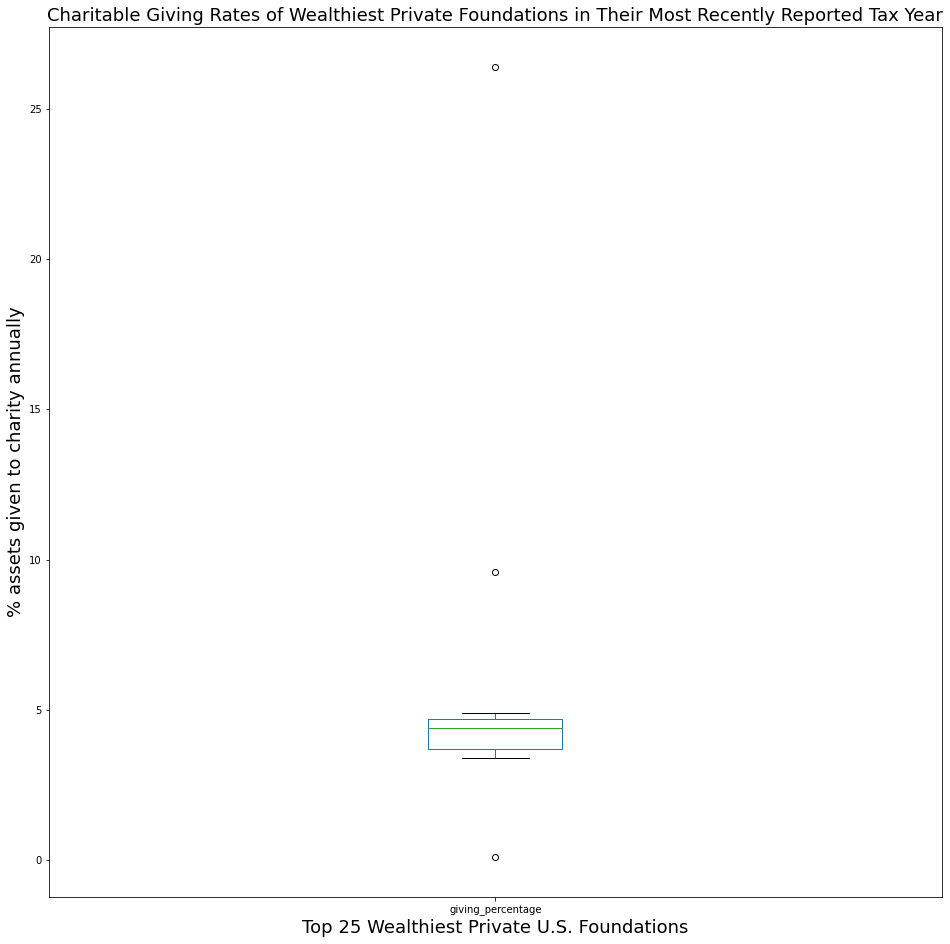

In [14]:
from matplotlib import pyplot as plt

def plot_giving_rate():
    """reads in the dataset of 25 foundation giving rates and returns a boxplot"""
    # call previous function to store the top 25 dataframe to a local variable
    df = get_charity_df()
    
    # adjust the figure size before specifying the plot you want
    plt.figure(figsize=(16,16))
    
    # use pandas indexing to specify one column of the dataframe for plotting
    df['giving_percentage'].plot(kind='box')
    plt.xlabel('Top 25 Wealthiest Private U.S. Foundations', size=18)
    plt.ylabel('% assets given to charity annually', size=18)
    plt.title('Charitable Giving Rates of Wealthiest Private Foundations in Their Most Recently Reported Tax Year', size=18)

plot_giving_rate()

For future research, it would be interesting to expand the dataframe and look at 50-100 of the wealthiest private foundations in the U.S. Later on this calendar year or in 2022, I think it would be especially interesting to look at giving rates in the 2020 tax year for these foundations compared to previous years, to determine whether or not the largest foundations in the U.S. increased their payout rates in response to the needs that have emerged from the COVID-19 pandemic. 